# Pendulum Physics
What is the relationship between variables of a pendulum?

In [ ]:
#import python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit
import scipy as sp
import statistics as stats

# Pendulum Lab Dry Run
Purpose: To determine how the period for small oscillations of a pendulum depends on its mass and length.

Equipment: PhET Pendulum Simulation (http://phet.colorado.edu/sims/pendulum-lab/pendulum-lab_en.html)

Procedure: Measure the period of a pendulum for 15° oscillations on either side of the middle:

A) as a function of its length with a constant mass

B) as a function of mass with a constant length.

Discuss your results with your team before writing your conclusion.

Conclusion: Write a concluding statement below, summarizing your results and including the appropriate equation.

# Part 1
Gather data and import. Visualize the data in a way so as to best understand what the relationships are between the key variables.

Jumpstart: focus on the length, mass and period of the pendulum.

Work directly with your team to develop your code and troubleshoot.

In [ ]:
#create data table from PhET
#importing the data set
data_url = "https://github.com/fizzixprof/Pendulum/raw/master/PendulumPhetData.csv"
data = pd.read_csv(data_url,error_bad_lines=False)
#show the first 3 lines of the data set
data.head(3)


,Mass (kg),Length (m),Period (s)
0,1.0,0.7,1.6856
1,1.5,0.7,1.6856
2,0.1,0.7,1.6856


In [ ]:
data.shape #show the size (rows,columns) of the data set

(9, 3)

Text(0, 0.5, 'Period (s)')

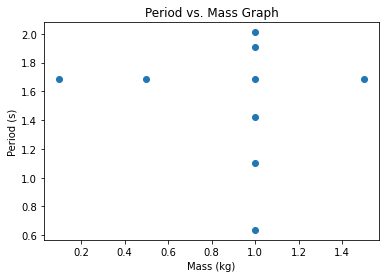

In [ ]:
plt.scatter(data["Mass (kg)"], data["Period (s)"]) # Telling what data to plot (x,y)
plt.title("Period vs. Mass Graph")      # Adding a Title
plt.xlabel("Mass (kg)")                   # Adding axis labels
plt.ylabel("Period (s)")

This graph has helpful information but it's difficult to view.

Only graph the data where just the mass is varied and find the resulting period - where the third variable of length is kept constant.

In [ ]:
#Reorganize our data into a dataframe
df = pd.DataFrame(data, columns = ['Mass (kg)','Length (m)','Period (s)'])
print (df)

   Mass (kg)  Length (m)  Period (s)
0        1.0         0.7      1.6856
1        1.5         0.7      1.6856
2        0.1         0.7      1.6856
3        0.5         0.7      1.6856
4        1.0         0.1      0.6371
5        1.0         0.3      1.1021
6        1.0         0.5      1.4227
7        1.0         0.9      1.9074
8        1.0         1.0      2.0103


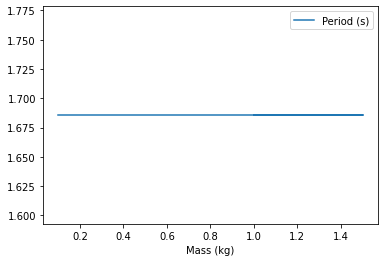

In [ ]:
#only plot rows 0 through 3
data.iloc[0:3].plot(x='Mass (kg)',y='Period (s)')

What is this graph telling us about the relationship between mass and period of pendulums?

Now graph all the data with Length (m) on the x-axis to investigate a different relationship within the same motion.

Text(0, 0.5, 'Period (s)')

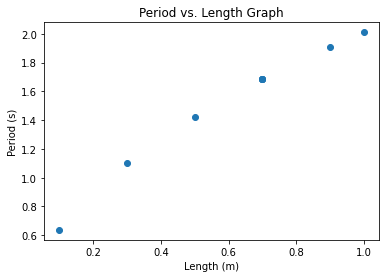

In [ ]:
plt.scatter(data["Length (m)"], data["Period (s)"]) # Telling what data to plot (x,y)
plt.title("Period vs. Length Graph")      # Adding a Title
plt.xlabel("Length (m)")                   # Adding axis labels
plt.ylabel("Period (s)")

Let's create a best fit line for this data and see what it looks like.

best fit line:
y = 0.60 + 1.48x


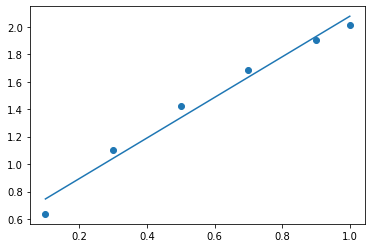

In [ ]:
# sample points
X = [.1,.3,.5,.7,.9,1]
Y = [0.6371,1.1021,1.4227,1.6856,1.9074,2.0103]

# solve for a and b
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b

# solution
a, b = best_fit(X, Y)
#best fit line:
#y = 0.80 + 0.92x

# plot points and fit line
import matplotlib.pyplot as plt
plt.scatter(X, Y)
yfit = [a + b * xi for xi in X]
plt.plot(X, yfit)

This doesn't look like a great fit, let's work on a curved fit and see if that works better.

[-0.86570866  2.44520076  0.41685421]


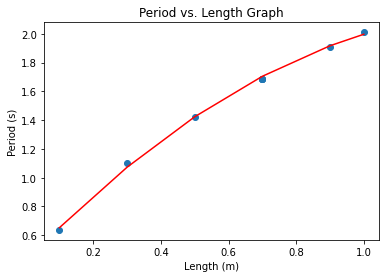

In [ ]:
plt.scatter(data["Length (m)"], data["Period (s)"]) # Telling what data to plot (x,y)
plt.title("Period vs. Length Graph")      # Adding a Title
plt.xlabel("Length (m)")                   # Adding axis labels
plt.ylabel("Period (s)")

z = np.polyfit(X,Y,2)
p = np.poly1d(z)
plt.plot(X,p(X),"red")
print(z)

What does the negative exponent mean for your first polynomial coefficient?

In [ ]:
#additional draft of curve fit
plt.scatter(data["Length (m)"], data["Period (s)"]) # Telling what data to plot (x,y)
plt.title("Period vs. Length Graph")      # Adding a Title
plt.xlabel("Length (m)")                   # Adding axis labels
plt.ylabel("Period (s)")

from scipy.optimize import curve_fit
def func(x,a,b):
  return(a*np.sqrt(x/b))

xdata = np.linspace(0, 1, 1000000)
y = func(xdata, 6.3, 9.81)
plt.scatter(xdata,y)
plt.show()

#error: need to find how to minimize orange dots and show scatter

# Pendulum Lab: Complete Part 1

Determine the following answers as a team:

*  What is the relationship between mass and period?
*  What is the relationship between length and period?

Compare your results with other teams in the class.

# Pendulum Lab: Part 2
Recall the relationship between the length and period of a pendulum. Could there be any other variables that affect the period?

Return to the PhET and get 2 sets of period data within 5 degrees, keeping the length the same. For example: one set between 5-10 degrees and one set between 35-40 degrees.

We will perform a t-test on the averages of these two arrays to see if the periods are truly different when you change the angle of the pendulum.

In [ ]:
import scipy.stats as spstats
Deg1 = [5,6,7,8,9,10]
Per1 = [1.4192,1.4195,1.4198,1.4202,1.4207,1.4212]
Deg2 = [35,36,37,38,39,40]
Per2 = [1.4523,1.4543,1.4564,1.4585,1.4601,1.463]

Find the average and standard deviation of these two sets of period data

In [ ]:
print('Mean:', np.mean(Per1))
print('Standard Deviation:', np.std(Per1))
print('Mean:', np.mean(Per2))
print('Standard Deviation:', np.std(Per2))

Mean: 1.4201
Standard Deviation: 0.0006879922480183588
Mean: 1.4574333333333331
Standard Deviation: 0.0035700918133229937


In [ ]:
# Perform t-test and print result
t_result=stats.ttest_ind_from_stats(1.4201,0.00069,6,1.4574,0.00357,6,equal_var=True)
print(t_result)

Ttest_indResult(statistic=-25.127674890095783, pvalue=2.281897913281008e-10)


We are comparing the average period for these two sets of data. We assume a **null hypothesis**: that the averages are the same. This would be true if there was no relationship between the angle of the pendulum and its period.

If your p-value is greater than 0.01, you "fail to reject the null hypothesis". This is a way of saying that you have evidence to assume these means are the same. A value above 0.01 would indicate no relationship between angle and period.

If your p-value is less than 0.01, you "reject the null hypothesis". This is a way of saying you have enough evidence to state that the angle affects the period.

If you reject the null, the next step would be to find the equation that describes this relationship.

Text(0, 0.5, 'Period (s)')

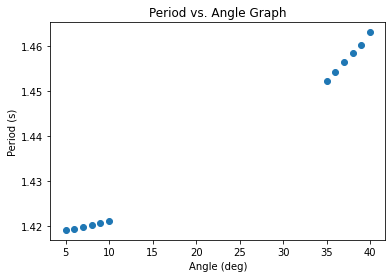

In [ ]:
#start by combining your data
Deg = [5,6,7,8,9,10,35,36,37,38,39,40]
Per = [1.4192,1.4195,1.4198,1.4202,1.4207,1.4212,1.4523,1.4543,1.4564,1.4585,1.4601,1.463]
#plot your two lists vs. each other
plt.scatter(Deg,Per)
plt.title("Period vs. Angle Graph")
plt.xlabel("Angle (deg)")
plt.ylabel("Period (s)")

It's likely you'll need to fill in more data points.